<a href="https://colab.research.google.com/github/LeeTae-hyun/GIS_Python/blob/master/Lab05_Vector_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install geopandas
! pip install matplotlib
! pip install matplotlib_scalebar
! pip install pathlib

In [128]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
data_folder = Path("/content/drive/MyDrive/GeoPython(2023GIS)/Lab05_Vector data/Seoul.shp")
fp = data_folder / "서울_시군구.shp"
data = gpd.read_file(fp)

In [129]:
data.head()

,DISTRICT_I,DISTRICT_N,DISTRICT_T,X_COORDINA,Y_COORDINA,UPDISTRICT,AREA,CITY,Popden,geometry
0,11010,종로구,3,953859.087841,1.955185e+06,11,2.397306e+07,서울특별시,6649,"POLYGON ((953683.831 1959209.867, 953647.336 1..."
1,11020,중구,3,955479.682109,1.951317e+06,11,9.982380e+06,서울특별시,13517,"POLYGON ((957890.389 1952616.741, 957909.911 1..."
2,11030,용산구,3,954048.343054,1.948133e+06,11,2.187632e+07,서울특별시,11188,"POLYGON ((953114.224 1950746.994, 953114.209 1..."
3,11040,성동구,3,959461.062083,1.950286e+06,11,1.680424e+07,서울특별시,17822,"POLYGON ((959381.840 1952723.889, 959416.045 1..."
4,11050,광진구,3,963406.655140,1.949790e+06,11,1.703593e+07,서울특별시,21105,"POLYGON ((964825.061 1952633.245, 964875.568 1..."


<AxesSubplot:>

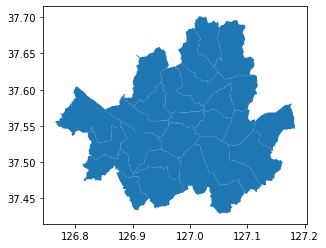

In [147]:
data.plot()

In [131]:
#map projection

In [152]:
print(type(data.crs))

<class 'pyproj.crs.crs.CRS'>


In [155]:
data.crs

<Derived Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [159]:
data_WGS84 = data.copy()

In [168]:
data_WGS84 = data.to_crs(epsg=4326)

In [165]:
data_WGS84.crs.to_epsg()

4326

In [166]:
data_WGS84.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

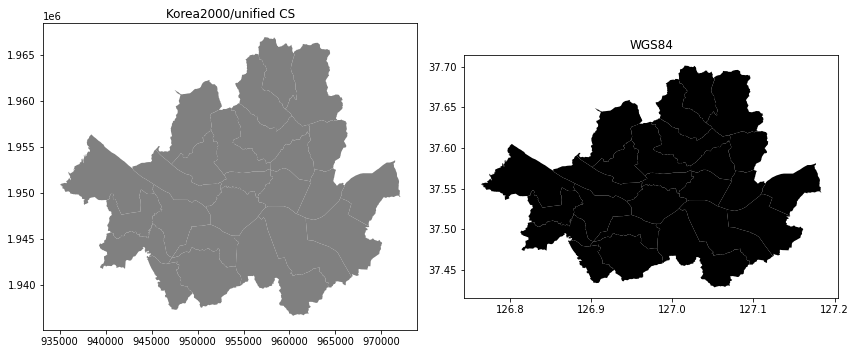

In [167]:
#CRS 차이점 시각화

#Make subplots that are next to each others
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,12))

#Plot the data in crs
data.plot(ax=ax1, facecolor = "gray")

#Add title
ax1.set_title("Korea2000/unified CS")

#Plot the one with epsg4166
data_WGS84.plot(ax=ax2, facecolor = "black")

#Add title
ax2.set_title("WGS84")

#Set aspect ratio as 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)

#Remove empty white space around the plot
plt.tight_layout()

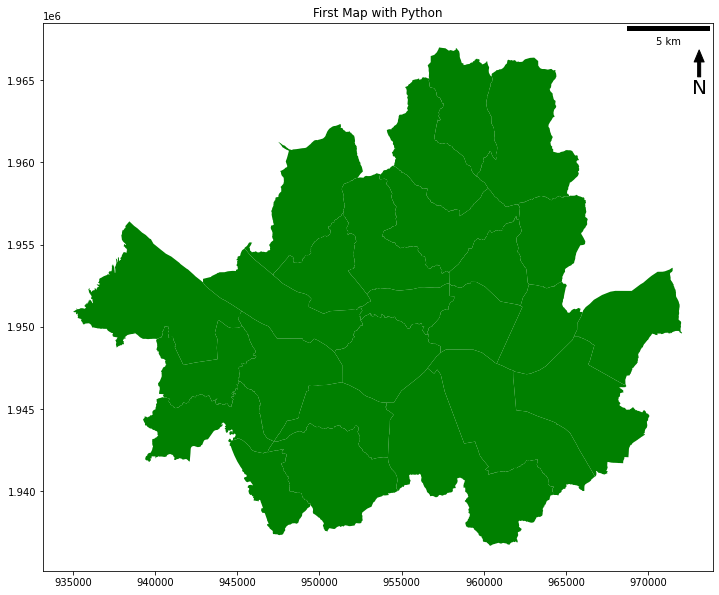

In [137]:
#Mapping
fig, ax = plt.subplots(figsize=(12,12))

data_5179.plot(ax=ax, facecolor="green")

#Add title
ax.set_title("First Map with Python")

#Add north Arrow
x, y, arrow_length = 0.98, 0.95, 0.07
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=3, headwidth=10),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

#Add scale bar
from matplotlib_scalebar.scalebar import ScaleBar

ax.add_artist(ScaleBar(1))

